# DATA SCIENCE PROJECT



1] DATASET SELECTION
    
    Dataset name: camera_dataset
    Source: Kaggle
    No. of observations: 1038
    Percentage of missing values: 5%
    

2] EXPLORATORY DATA ANALYSIS

Describe the features of the dataset

1.MODEL:
This feature of the dataset describes about the various models of the different type(company) of cameras present in the choosen dataset.

2.RELEASE DATE:
This feature of the dataset describes about the various release dates(in years)of the different models of the cameras in the dataset.

3.MAX RESOLUTION:
This feature of the dataset describes about the maximum resolution of the different models of the cameras present in the dataset.

4.MIN RESOLUTION:
This feature of the dataset describes about the minimum resolution of the different models of the cameras present in the dataset.

5.EFFECTIVE PIXELS:
This feature of the dataset describes about the different number of effective pixels of each camera model in the dataset.

6.ZOOM WIDE:
This feature of the dataset describes about the short focal length of the different cameras in the dataset.

7.ZOOM TELE:
This feature of the dataset describes about the long focal length of the different cameras in the dataset.

8.NORMAL FOCUS RANGE:
This feature of the dataset describes about the lens of the various cameras in the dataset with a focal length approximately equal to the diagonal of the film format or of a digital camera's image sensor. Most 35mm cameras normal lenses have a focal length of approximately 50 mm.

9.MACRO FOCUS RANGE:
This feature of the dataset describes about the focal length of the various cameras in the dataset, a macro lens (50 mm on a 35 mm camera) can focus so close that lighting remains difficult. Macro lens  has a focal lengths from about 100 to 200 mm.

10.STORAGE INCLUDED:
This feature of the dataset describes about the inbuilt storage that is included in the various cameras of the dataset.

11.WEIGHT:
This feature of the dataset describes about the weight of the cameras(inclusive of the weight of the batteries)in the dataset.

12.DIMENSION:
This feature of the dataset describes about the dimensions of the cameras in the dataset.

13.PRICE:
This feature of the dataset describes about the prices of the cameras in the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import statsmodels.api as sm
from scipy.stats import norm

In [2]:
dataset=pd.read_csv("C:/Users/Rahul Bhat/Desktop/SDS project/camera_dataset.csv")
dataset.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1037.000000,984.000000,1003.000000,953.000000,953.000000,901.000000,910.000000,913.000000,1015.000000,1022.000000,1038.000000
mean,2003.590559,2477.058824,1871.286585,4.756730,35.903463,132.364113,50.857936,8.874725,19.798467,325.870936,106.806751,457.384393
std,2.724755,755.976743,738.892348,2.758156,3.261553,89.875022,18.160207,8.069808,28.424548,258.965633,21.034371,760.452918
min,1994.000000,512.000000,320.000000,1.000000,23.000000,28.000000,1.000000,1.000000,1.000000,100.000000,30.000000,14.000000
25%,2002.000000,2048.000000,1280.000000,3.000000,35.000000,102.000000,40.000000,4.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,5.000000,36.000000,111.000000,50.000000,7.000000,16.000000,230.000000,102.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,24.000000,350.000000,116.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000




Data cleaning and missing value treatment

    No.of missing values in each column
   

In [3]:
dataset.isnull().sum()

Model                        0
Release date                 0
Max resolution               1
Low resolution              54
Effective pixels            35
Zoom wide (W)               85
Zoom tele (T)               85
Normal focus range         137
Macro focus range          128
Storage included           125
Weight (inc. batteries)     23
Dimensions                  16
Price                        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000140B7122EC8>,
      dtype=object)

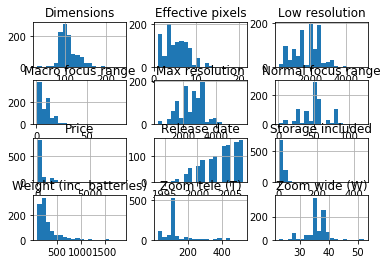

In [4]:
dataset.hist(column=["Release date","Max resolution","Low resolution","Effective pixels","Zoom wide (W)","Zoom tele (T)","Normal focus range","Macro focus range","Storage included","Weight (inc. batteries)","Dimensions","Price"], bins=20)

Replace the missing values with the mean of that column

Print the original dataset

In [5]:
dataset

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,NaN,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,NaN,4.0,420.0,158.0,179
2,Agfa ePhoto CL18,2000,640.0,NaN,NaN,45.0,45.0,NaN,NaN,2.0,NaN,NaN,179
3,Agfa ePhoto CL30,1999,1152.0,640.0,NaN,35.0,35.0,NaN,NaN,4.0,NaN,NaN,269
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,NaN,43.0,43.0,50.0,NaN,40.0,300.0,128.0,1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62


Replace the NaN value with mean

In [6]:
for i in dataset:
       if(i=="Model"):
            continue;
       if(i=='Price' or i=='Weight (inc. batteries)'):
           dataset[i].fillna(dataset[i].mean(),inplace=True)
       else:
           dataset[i].fillna(int(dataset[i].mean()),inplace=True)

Cleaned dataset

In [7]:
dataset

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,4.0,38.0,114.0,70.0,40.0,4.0,420.000000,95.0,179
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,8.0,4.0,420.000000,158.0,179
2,Agfa ePhoto CL18,2000,640.0,1871.0,4.0,45.0,45.0,50.0,8.0,2.0,325.870936,106.0,179
3,Agfa ePhoto CL30,1999,1152.0,640.0,4.0,35.0,35.0,50.0,8.0,4.0,325.870936,106.0,269
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,4.0,43.0,43.0,50.0,8.0,40.0,300.000000,128.0,1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.000000,120.0,62
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.000000,116.0,62
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.000000,107.0,62
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.000000,107.0,62


3] GRAPH VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000140B75978C8>,
      dtype=object)

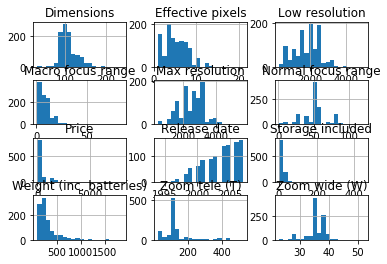

In [8]:
dataset.hist(column=["Release date","Max resolution","Low resolution","Effective pixels","Zoom wide (W)","Zoom tele (T)","Normal focus range","Macro focus range","Storage included","Weight (inc. batteries)","Dimensions","Price"],bins=20)

AxesSubplot(0.08,0.07;0.87x0.81)


Text(0.5, 1.0, 'Number of Models produced throughout the year')

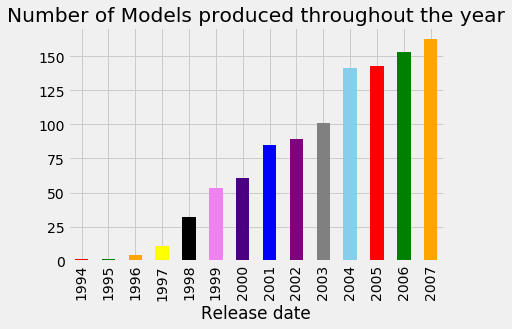

In [9]:
plt.style.use('fivethirtyeight')
print(dataset.pivot_table(index=['Release date'], aggfunc='size').plot(kind='bar',color=['red','green','orange','yellow','black','violet','indigo','blue','purple','grey','skyblue']))
plt.ylabel=["No. of cameras"]
plt.title("Number of Models produced throughout the year")

Check for outliers

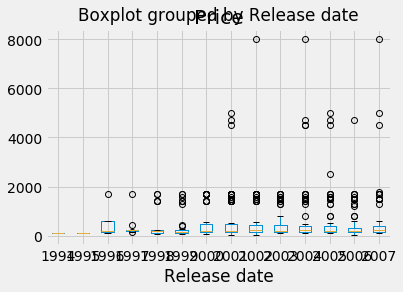

In [10]:
df=dataset[['Release date','Price']]
df.boxplot(column='Price',by='Release date')

Growth in production

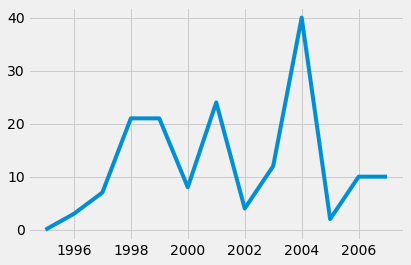

In [11]:
growth_rate=[]
growth=list(dataset["Release date"].value_counts())
dates=set(dataset["Release date"])
j=0
for i in growth:
    growth_rate.append(int(j-i))
    j=i
del(growth_rate[0])
growth.clear()
for i in growth_rate:
    growth.insert(0,i)
del(growth_rate)
dates=list(dates)
del(dates[0])
plt.plot(dates,growth)

Adding a new feature to the dataframe

In [12]:
Manufacturer=list()
release_dates=set(df["Release date"])
for i in dataset['Model']:
    if('Agfa' in i):
        Manufacturer.append('Agfa')
    elif('Canon' in i):
        Manufacturer.append('Canon')
    elif('Casio' in i):
        Manufacturer.append('Casio')
    elif('Contax' in i):
        Manufacturer.append('Contax')
    elif('Epson' in i):
        Manufacturer.append('Epson')
    elif('Fujifilm' in i):
        Manufacturer.append('Fujifilm')
    elif('HP' in i):
        Manufacturer.append('HP')
    elif('JVC' in i):
        Manufacturer.append('JVC')
    elif('Kodak' in i):
        Manufacturer.append('Kodak')
    elif('Kyocera' in i):
        Manufacturer.append('Kyocera')
    elif('Leica' in i):
        Manufacturer.append('Leica')
    elif('Nikon' in i):
        Manufacturer.append('Nikon')
    elif('Olympus' in i):
        Manufacturer.append('Olympus')
    elif('Panasonic' in i):
        Manufacturer.append('Panasonic')
    elif('Pentax' in i):
        Manufacturer.append('Pentax')
    elif('Ricoh' in i):
        Manufacturer.append('Ricoh')
    elif('Samsung' in i):
        Manufacturer.append('Samsung')
    elif('Sanyo' in i):
        Manufacturer.append('Sanyo')
    elif('Sigma' in i):
        Manufacturer.append('Sigma')
    elif('Sony' in i):
        Manufacturer.append('Sony')
    elif('Toshiba' in i):
        Manufacturer.append('Toshiba')
dataset['Manufacturer']=Manufacturer

Plot representing no.of models manufactured by individual manufacturers

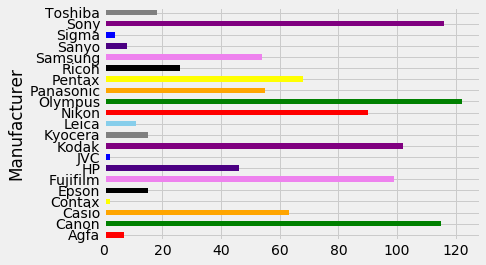

In [13]:
dataset.pivot_table(index=['Manufacturer'], aggfunc='size').plot(kind='barh',color=['red','green','orange','yellow','black','violet','indigo','blue','purple','grey','skyblue'])

Accumulated price of all manufacturers throughout the year

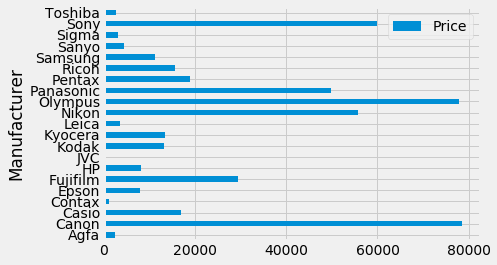

In [14]:
turn_over=dataset[['Manufacturer','Price']]
turn_over.pivot_table(index=['Manufacturer'], aggfunc='sum').plot(kind='barh')

4] NORMALIZATION

Mean and variance of each column

In [15]:
dataset.mean()

Release date               2003.590559
Max resolution             2477.058767
Low resolution             1871.271676
Effective pixels              4.731214
Zoom wide (W)                35.829480
Zoom tele (T)               132.334297
Normal focus range           50.744701
Macro focus range             8.766859
Storage included             19.702312
Weight (inc. batteries)     325.870936
Dimensions                  106.794316
Price                       457.384393
dtype: float64

In [16]:
dataset.std()**2

Release date                    7.424289
Max resolution             570949.725569
Low resolution             517531.874048
Effective pixels                7.369343
Zoom wide (W)                   9.827211
Zoom tele (T)                7415.437800
Normal focus range            286.307952
Macro focus range              57.166422
Storage included              710.631644
Weight (inc. batteries)     65575.780224
Dimensions                    435.628097
Price                      578288.639949
dtype: float64

Make mean 0 and variance 1

In [17]:
numeric_dataset = dataset[["Release date","Max resolution","Low resolution","Effective pixels","Zoom wide (W)","Zoom tele (T)","Normal focus range","Macro focus range","Storage included","Weight (inc. batteries)","Dimensions","Price"]]
normalized_dataset=(numeric_dataset-numeric_dataset.mean())/numeric_dataset.std()

Print normalized dataset

In [18]:
normalized_dataset

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,-2.418771,-1.923022,-1.711533,-0.269358,0.692387,-0.212910,1.137977,4.130904,-0.589035,3.675801e-01,-0.565086,-0.366077
1,-2.051766,-1.584224,-1.711533,-1.374472,0.692387,-0.212910,-0.044011,-0.101425,-0.589035,3.675801e-01,2.453354,-0.366077
2,-1.317755,-2.431219,-0.000378,-0.269358,2.925357,-1.014183,-0.044011,-0.101425,-0.664061,-1.109886e-15,-0.038057,-0.366077
3,-1.684760,-1.753623,-1.711533,-0.269358,-0.264600,-1.130310,-0.044011,-0.101425,-0.589035,-1.109886e-15,-0.038057,-0.247727
4,-1.684760,-1.753623,-1.711533,-0.269358,2.287365,-1.037409,-0.044011,-0.101425,0.761420,-1.010277e-01,1.016001,1.106729
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-0.950749,-0.567829,-1.177753,-0.637729,0.692387,-0.212910,-2.407989,0.163096,-0.438985,-2.292639e-02,0.632707,-0.519933
1034,-1.317755,-0.567829,-1.177753,-0.637729,-0.264600,-0.317424,1.728971,0.030835,-0.138884,2.504282e-01,0.441060,-0.519933
1035,-0.950749,-0.567829,-1.177753,-0.637729,-0.264600,-0.398712,1.728971,0.163096,-0.438985,5.517491e-02,0.009855,-0.519933
1036,-0.950749,-0.101982,-0.933103,-0.637729,-0.264600,-0.398712,1.728971,0.163096,-0.138884,5.517491e-02,0.009855,-0.519933


Verify that the mean is 0 and variance is 1

In [19]:
normalized_dataset.mean().round(decimals=1)

Release date              -0.0
Max resolution             0.0
Low resolution             0.0
Effective pixels           0.0
Zoom wide (W)             -0.0
Zoom tele (T)              0.0
Normal focus range         0.0
Macro focus range         -0.0
Storage included          -0.0
Weight (inc. batteries)   -0.0
Dimensions                 0.0
Price                     -0.0
dtype: float64

In [20]:
normalized_dataset.var()

Release date               1.0
Max resolution             1.0
Low resolution             1.0
Effective pixels           1.0
Zoom wide (W)              1.0
Zoom tele (T)              1.0
Normal focus range         1.0
Macro focus range          1.0
Storage included           1.0
Weight (inc. batteries)    1.0
Dimensions                 1.0
Price                      1.0
dtype: float64

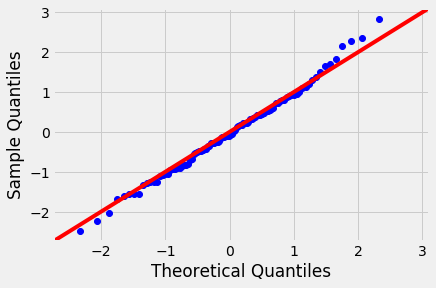

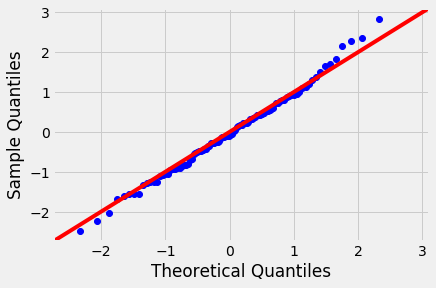

In [21]:
data_points = np.random.normal(0, 1, 100)     
sm.qqplot(data_points, line ='45')

5] HYPOTHESIS TESTING

In [22]:
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    #print('actual z value :', actual_z)
    #print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False

def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    #print('actual z value :', actual_z)
    #print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False


  
    
reject1=two_sided_hypo(1998.6,2004,1.140175,5,0.05)
if(reject1):
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')



    
reject2=one_sided_hypo(76.2,106,73.042453,5,0.05)
if(reject2):
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
    
 

reject3=one_sided_hypo(421.0,458, 492.361656,5,0.05)
if(reject3):
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

Reject NULL hypothesis
Failed to reject NULL hypothesis
Failed to reject NULL hypothesis


6] CORRELATION

In [23]:
dataset.corr(method ='pearson')

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
Release date,1.000000,0.793229,0.788348,0.727437,-0.158559,0.219224,-0.036885,-0.280573,0.228688,-0.277609,-0.368209,-0.023249
Max resolution,0.793229,1.000000,0.903539,0.897375,-0.257676,0.207330,-0.016576,-0.286491,0.238868,0.094312,-0.088711,0.182783
Low resolution,0.788348,0.903539,1.000000,0.854653,-0.207279,0.228487,0.003808,-0.293249,0.243829,0.054294,-0.117810,0.133804
Effective pixels,0.727437,0.897375,0.854653,1.000000,-0.185677,0.198812,-0.039158,-0.277810,0.206505,0.083540,-0.048487,0.199242
Zoom wide (W),-0.158559,-0.257676,-0.207279,-0.185677,1.000000,-0.020743,0.063771,0.073385,-0.101012,-0.138453,-0.075149,-0.096697
Zoom tele (T),0.219224,0.207330,0.228487,0.198812,-0.020743,1.000000,-0.095580,-0.233013,0.062244,0.225876,0.087615,-0.010971
Normal focus range,-0.036885,-0.016576,0.003808,-0.039158,0.063771,-0.095580,1.000000,0.261964,0.094715,-0.030688,-0.023818,-0.058069
Macro focus range,-0.280573,-0.286491,-0.293249,-0.277810,0.073385,-0.233013,0.261964,1.000000,-0.115553,-0.020209,0.047992,-0.013845
Storage included,0.228688,0.238868,0.243829,0.206505,-0.101012,0.062244,0.094715,-0.115553,1.000000,-0.021489,-0.056216,-0.018707
Weight (inc. batteries),-0.277609,0.094312,0.054294,0.083540,-0.138453,0.225876,-0.030688,-0.020209,-0.021489,1.000000,0.737573,0.473046


Correlation of a variable with itself is 1
If correlation is higher, the quantities are highly related.